# MLP for Energy and Weight Prediction

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_1='/content/drive/MyDrive/Dataset_DL/DataStuctures/DataSetTrussStructure.xlsx'

In [ ]:
path_2='/content/drive/MyDrive/Dataset_DL/DataStuctures/DataSetTrussStructureContraintes.xlsx'
path_3="/content/drive/MyDrive/Dataset_DL/DataStuctures/DataSetTrussStructureAplatit.xlsx"
path_4="/content/drive/MyDrive/Dataset_DL/DataStuctures/DataSetTrussStructureDeplacements.xlsx"

In [ ]:
df1 = pd.read_excel(path_1)
df2 = pd.read_excel(path_2)
df3 = pd.read_excel(path_3)
df4 = pd.read_excel(path_4)

In [ ]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

Index(['CS1', 'CS2', 'CS3', 'CS4', 'CS5', 'CS6', 'Energie', 'Poids',
       'N° image'],
      dtype='object')
Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'N° image'], dtype='object')
Index(['CX1', 'CX2', 'CX3', 'CX4', 'CY1', 'CY2', 'CY3', 'CY4', 'N° image'], dtype='object')
Index(['DX1', 'DY1', 'DX2', 'DY2', 'DX3', 'DY3', 'DX4', 'DY4', 'N° image'], dtype='object')


In [ ]:
df1

,CS1,CS2,CS3,CS4,CS5,CS6,Energie,Poids,N° image
0,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.025088,3901.671856,1
1,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.043002,3159.119087,2
2,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.021369,3575.895111,3
3,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.044654,3276.268680,4
4,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.036768,3173.978488,5
...,...,...,...,...,...,...,...,...,...
1996,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.021233,3352.060281,1997
1997,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.023403,3338.811195,1998
1998,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.020354,3456.720204,1999
1999,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.044875,3182.877027,2000


In [ ]:
# Merge the datasets based on the common column 'N° image'
merged_df12 = pd.merge(df1, df2, on='N° image', how='inner')
merged_df34 = pd.merge(df3, df4, on='N° image', how='inner')
merged_df = pd.merge(merged_df12, merged_df34, on='N° image', how='inner')

In [ ]:
merged_df.head()

,CS1,CS2,CS3,CS4,CS5,CS6,Energie,Poids,N° image,C1,...,CY3,CY4,DX1,DY1,DX2,DY2,DX3,DY3,DX4,DY4
0,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.025088,3901.671856,1,-49413.749818,...,9.144000,9.144,0,0,-0.000007,-0.000025,0.000005,-1.989229e-05,0,0
1,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.043002,3159.119087,2,-64454.631262,...,0.463345,9.144,0,0,-0.000009,-0.000043,-0.000002,-3.920309e-08,0,0
2,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.021369,3575.895111,3,-46291.240662,...,6.571136,9.144,0,0,-0.000006,-0.000021,0.000002,-1.575411e-05,0,0
3,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.044654,3276.268680,4,-88722.556188,...,7.952127,9.144,0,0,-0.000012,-0.000045,0.000028,1.415966e-06,0,0
4,0.022575,0.022575,0.022575,0.022575,0.022575,0.022575,0.036768,3173.978488,5,-104616.669276,...,1.815285,9.144,0,0,-0.000014,-0.000037,0.000003,-5.127493e-06,0,0


In [ ]:
data=merged_df.drop('N° image',axis=1)
X = data[['CS1'	,'C1'	,'C2','C4','C5'	,'C6','CX2','CX3','CY3','DX2','DY2','DX3','DY3']]
y_energy = data['Energie']
y_weight = data['Poids']


In [ ]:
X

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error



# Results on merged dataset

In [ ]:
# Define features (X) and targets (y)
X.shape


(2001, 13)

In [ ]:
# Split the dataset into training, validation  and testing sets
X_train_E, X_test_E, y_energy_train, y_energy_test = train_test_split(X, y_energy, test_size=0.2, random_state=42)
X_train_E, X_val_E, y_energy_train, y_energy_val = train_test_split(X_train_E, y_energy_train, test_size=0.25, random_state=42)
X_train_W, X_test_W, y_weight_train, y_weight_test = train_test_split(X, y_weight, test_size=0.2, random_state=42)
X_train_W, X_val_W, y_weight_train, y_weight_val = train_test_split(X_train_W, y_weight_train, test_size=0.25, random_state=42)

In [ ]:
# Reset indices for energy prediction sets
X_train_E.reset_index(drop=True, inplace=True)
X_val_E.reset_index(drop=True, inplace=True)
X_test_E.reset_index(drop=True, inplace=True)
y_energy_train.reset_index(drop=True, inplace=True)
y_energy_val.reset_index(drop=True, inplace=True)
y_energy_test.reset_index(drop=True, inplace=True)

# Reset indices for weight prediction sets
X_train_W.reset_index(drop=True, inplace=True)
X_val_W.reset_index(drop=True, inplace=True)
X_test_W.reset_index(drop=True, inplace=True)
y_weight_train.reset_index(drop=True, inplace=True)
y_weight_val.reset_index(drop=True, inplace=True)
y_weight_test.reset_index(drop=True, inplace=True)

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [ ]:
!pip install hiddenlayer

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchviz import make_dot
from torchsummary import summary
from sklearn.preprocessing import StandardScaler
import hiddenlayer as hl

In [ ]:
class Dataset(torch.utils.data.Dataset):
    '''
    Prepare the Boston dataset for regression
    '''

    def __init__(self, X, y, scale_data=True,energy=False):
        if not torch.is_tensor(X) and not torch.is_tensor(y):
            # Reshape y into a 2D array with a single column
            y = y.reshape(-1, 1)

            # Apply scµaling if necessary
            if scale_data:
                X = StandardScaler().fit_transform(X)
                if not energy:
                  y_scaler = StandardScaler()
                  y = y_scaler.fit_transform(y)
                else:
                  y_scaler = None

            self.X = torch.from_numpy(X)
            self.y = torch.from_numpy(y)
            self.y_scaler = y_scaler

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]


In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(13, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

mlp_weight = MLP()
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp_weight.parameters(), lr=1e-4)

In [ ]:
x = torch.randn(1, 13)

# Perform a forward pass to generate the computation graph
y = mlp_weight(x)

# Use make_dot to visualize the model
dot = make_dot(y, params=dict(mlp_weight.named_parameters()))
dot.render("mlp_model", format="png")  # Save the visualization to a file

'mlp_model.png'

In [ ]:

# Now create a summary with the correct input size and device
# Note that input_size should be (13,) instead of (1, 13) since we don't include the batch size in input_size

# Define the loss function and optimizer


In [ ]:
dataset_train =Dataset(X_train_W, y_weight_train.values)
dataset_val=Dataset(X_val_W, y_weight_val.values)
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True, num_workers=1)
val_loader = torch.utils.data.DataLoader(dataset_val, batch_size=32, shuffle=True, num_workers=1)


In [ ]:
y_weight_train.values

array([3229.19757367, 3500.82857085, 3597.85221867, ..., 3096.68437977,
       3323.69963759, 3552.20005003])

In [ ]:
X_train_W.shape

(1200, 13)

In [ ]:
# Assume train_loader and val_loader are defined elsewhere

# Define the loss function and optimizer


# Lists to store training and validation losses
train_losses = []
val_losses = []

# Lists to store training and validation metrics (MAE)
train_metrics = []
val_metrics = []

best_val_loss = float('inf')
best_model = None

for epoch in range(100):  # 100 epochs
    # Print epoch
    print(f'Starting epoch {epoch + 1}=================================================')

    # Set current loss value
    current_loss = 0.0
    train_metric_sum = 0.0

    # Iterate over the DataLoader for training data
    mlp_weight.train()  # Set model to training mode
    for i, data in enumerate(train_loader, 0):
        # Get and prepare inputs
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = mlp_weight(inputs)

        # Compute loss
        loss = loss_function(outputs, targets)

        # Compute metric (MAE)
        mae = torch.abs(outputs - targets).mean().item()

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        # Print statistics
        current_loss += loss.item()
        train_metric_sum += mae
        if i % 32 == 0:
            print(f'Loss after mini-batch {i + 1}: {current_loss / len(train_loader)}, MAE: {train_metric_sum / (i + 1)}')
            current_loss = 0.0

    # Validation step
    mlp_weight.eval()  # Set model to evaluation mode
    val_loss = 0.0
    val_metric_sum = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.float(), targets.float()
            outputs = mlp_weight(inputs)
            loss = loss_function(outputs, targets)
            val_loss += loss.item()

            # Compute metric (MAE)
            mae = torch.abs(outputs - targets).mean().item()
            val_metric_sum += mae

    val_loss /= len(val_loader)
    val_mae = val_metric_sum / len(val_loader)
    print(f'Validation Loss after epoch {epoch + 1}: {val_loss}, MAE: {val_mae}')

    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = mlp_weight.state_dict()
        print(f'Best model saved with validation loss: {best_val_loss}')

    # Append losses and metrics to lists
    train_losses.append(current_loss / len(train_loader))
    val_losses.append(val_loss)
    train_metrics.append(train_metric_sum / len(train_loader))
    val_metrics.append(val_mae)

# Save the best model to a file
torch.save(best_model, 'best_mlp_model.pth')
print('Training process has finished.')

Starting epoch 1=================================================
Loss after mini-batch 1: 5.524592492484341e-06, MAE: 0.011617546901106834
Loss after mini-batch 33: 0.0005563167008068902, MAE: 0.01728996600617062
Validation Loss after epoch 1: 0.001954364993322927, MAE: 0.031802356672974735
Best model saved with validation loss: 0.001954364993322927
Starting epoch 2=================================================
Loss after mini-batch 1: 1.2740839003144125e-05, MAE: 0.015249243006110191
Loss after mini-batch 33: 0.0005133024904736024, MAE: 0.016701687042686073
Validation Loss after epoch 2: 0.0020219381146419505, MAE: 0.03212314485930479
Starting epoch 3=================================================
Loss after mini-batch 1: 1.3013917180758558e-05, MAE: 0.016905564814805984
Loss after mini-batch 33: 0.0004747963267666484, MAE: 0.016311336647380482
Validation Loss after epoch 3: 0.001821278603389286, MAE: 0.030870599672198296
Best model saved with validation loss: 0.0018212786033892

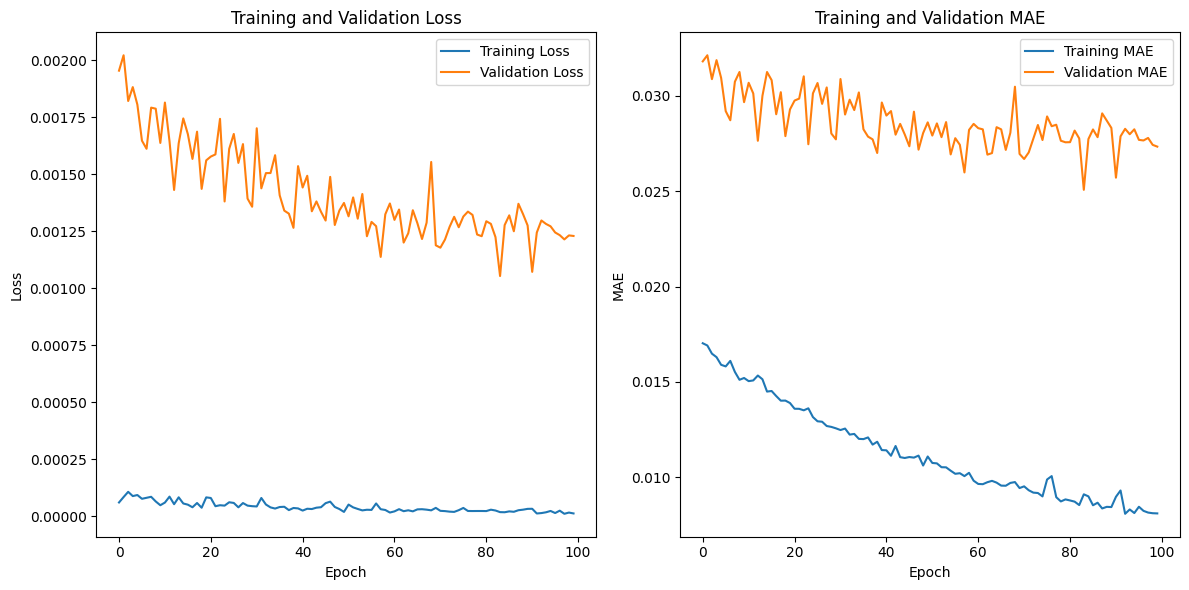

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting the MAE
plt.subplot(1, 2, 2)
plt.plot(train_metrics, label='Training MAE')
plt.plot(val_metrics, label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
dataset_test =Dataset(X_test_W, y_weight_test.values)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=32, shuffle=True, num_workers=1)

In [ ]:
y_scaler=dataset_test.y_scaler

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Test MAE: 0.042565
Test MSE: 0.003302
Test RMSE: 0.057466
Test R^2: 0.996698


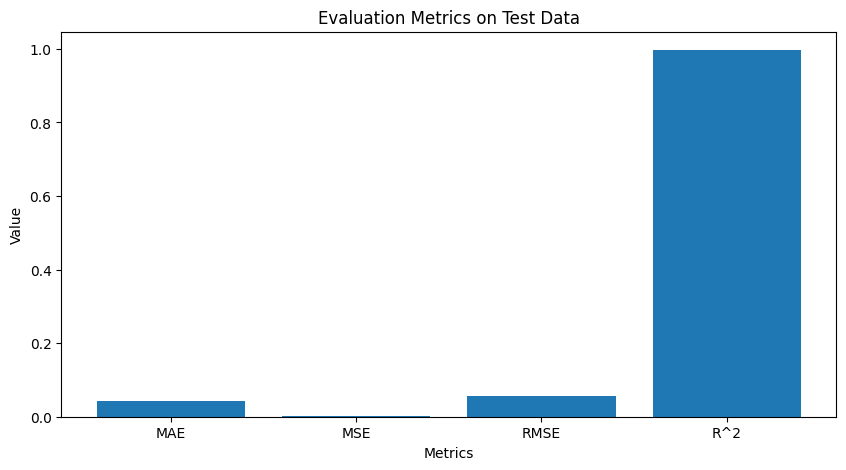

In [ ]:



# Initialize an empty list to store predictions and targets
test_predictions = []
test_targets = []

# Set the model to evaluation mode
mlp_weight.eval()

# Iterate over the test dataset
for i, data in enumerate(test_loader, 0):
    # Get inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()

    # Perform forward pass
    outputs = mlp_weight(inputs)

    # Save predictions and targets
    test_predictions.extend(outputs.detach().numpy())
    test_targets.extend(targets.detach().numpy())

# Convert lists to numpy arrays
test_predictions = np.array(test_predictions)
test_targets = np.array(test_targets)

# Calculate metrics
mae = mean_absolute_error(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_targets, test_predictions)

# Print the calculated metrics
print(f'Test MAE: {mae:.6f}')
print(f'Test MSE: {mse:.6f}')
print(f'Test RMSE: {rmse:.6f}')
print(f'Test R^2: {r2:.6f}')

# Plot the metrics
metrics = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R^2': r2}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(10, 5))
plt.bar(names, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics on Test Data')
plt.show()


# Energy Prediction

In [ ]:
mlp_energy= MLP()
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp_energy.parameters(), lr=1e-4)

In [ ]:
dataset_train_energy =Dataset(X_train_E, y_energy_train.values,energy=True)
dataset_val_energy=Dataset(X_val_E, y_energy_val.values,energy=True)
train_loader_energy = torch.utils.data.DataLoader(dataset_train_energy, batch_size=32, shuffle=True, num_workers=1)
val_loader_energy = torch.utils.data.DataLoader(dataset_val_energy, batch_size=32, shuffle=True, num_workers=1)


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Lists to store training and validation losses
train_losses = []
val_losses = []
train_maes = []
val_maes = []

best_val_loss = float('inf')
best_model = None

for epoch in range(100):  # 100 epochs
    print(f'Starting epoch {epoch + 1}=================================================')

    mlp_energy.train()  # Set model to training mode
    train_loss = 0.0
    train_metric_sum = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(train_loader_energy, 0):
        # Get and prepare inputs
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = mlp_energy(inputs)

        # Compute loss
        loss = loss_function(outputs, targets)

        # Compute metric (MAE)
        mae = torch.abs(outputs - targets).mean().item()

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        # Accumulate loss and metric
        train_loss += loss.item()
        train_metric_sum += mae

        if i % 32 == 0:
            print(f'Batch {i + 1}/{len(train_loader_energy)} - Loss: {train_loss / (i + 1):.6f}, MAE: {train_metric_sum / (i + 1):.6f}')

    train_loss /= len(train_loader_energy)
    train_mae = train_metric_sum / len(train_loader_energy)

    # Validation step
    mlp_energy.eval()  # Set model to evaluation mode
    val_loss = 0.0
    val_metric_sum = 0.0

    with torch.no_grad():
        for i, data in enumerate(val_loader_energy, 0):
            inputs, targets = data
            inputs, targets = inputs.float(), targets.float()
            outputs = mlp_energy(inputs)
            loss = loss_function(outputs, targets)
            val_loss += loss.item()

            # Compute metric (MAE)
            mae = torch.abs(outputs - targets).mean().item()
            val_metric_sum += mae

    val_loss /= len(val_loader_energy)
    val_mae = val_metric_sum / len(val_loader_energy)

    print(f'Epoch {epoch + 1} - Training Loss: {train_loss:.6f}, MAE: {train_mae:.6f}')
    print(f'Epoch {epoch + 1} - Validation Loss: {val_loss:.6f}, MAE: {val_mae:.6f}')

    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = mlp_energy.state_dict()
        print(f'Best model saved with validation loss: {best_val_loss:.6f}')

    # Append losses and metrics to lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_maes.append(train_mae)
    val_maes.append(val_mae)

# Save the best model to a file
torch.save(best_model, 'best_mlp_model_energy.pth')
print('Training process has finished.')




Starting epoch 1=================================================
Batch 1/38 - Loss: 0.000004, MAE: 0.001759
Batch 33/38 - Loss: 0.000006, MAE: 0.001836
Epoch 1 - Training Loss: 0.000006, MAE: 0.001847
Epoch 1 - Validation Loss: 0.000027, MAE: 0.004406
Best model saved with validation loss: 0.000027
Starting epoch 2=================================================
Batch 1/38 - Loss: 0.000004, MAE: 0.001612
Batch 33/38 - Loss: 0.000006, MAE: 0.001791
Epoch 2 - Training Loss: 0.000006, MAE: 0.001783
Epoch 2 - Validation Loss: 0.000026, MAE: 0.004300
Best model saved with validation loss: 0.000026
Starting epoch 3=================================================
Batch 1/38 - Loss: 0.000004, MAE: 0.001550
Batch 33/38 - Loss: 0.000006, MAE: 0.001794
Epoch 3 - Training Loss: 0.000006, MAE: 0.001767
Epoch 3 - Validation Loss: 0.000025, MAE: 0.004185
Best model saved with validation loss: 0.000025
Starting epoch 4=================================================
Batch 1/38 - Loss: 0.000003, MA

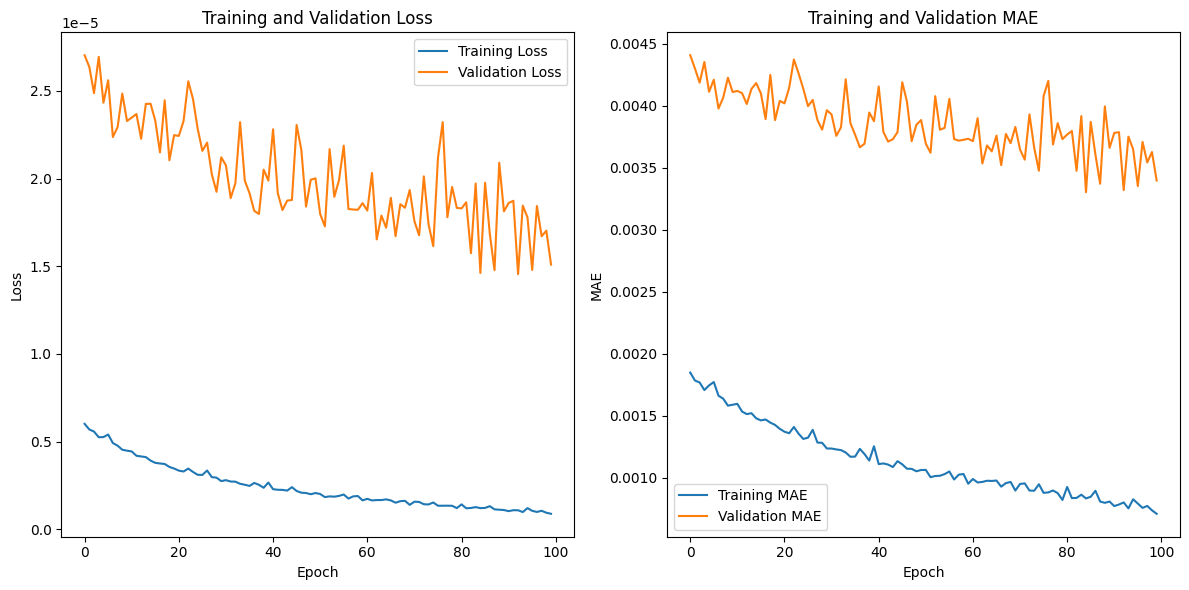

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting the MAE
plt.subplot(1, 2, 2)
plt.plot(train_maes, label='Training MAE')
plt.plot(val_maes, label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
dataset_test_energy =Dataset(X_test_E, y_energy_test.values,energy=True)
test_loader_energy = torch.utils.data.DataLoader(dataset_test_energy, batch_size=32, shuffle=True, num_workers=1)


Test MAE: 0.002541
Test MSE: 0.000009
Test RMSE: 0.002969
Test R²: 0.897593


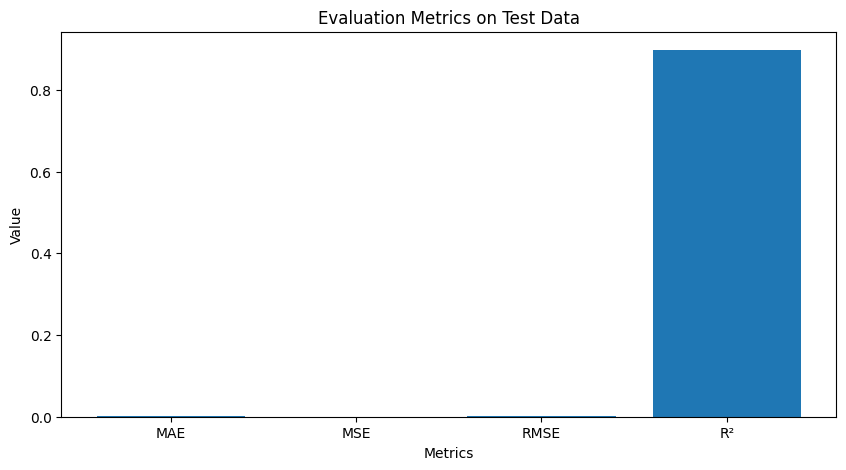

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize an empty list to store predictions and targets
test_predictions = []
test_targets = []

# Set the model to evaluation mode
mlp_energy.eval()

# Iterate over the test dataset
for i, data in enumerate(test_loader_energy, 0):
    # Get inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()

    # Perform forward pass
    outputs = mlp_energy(inputs)

    # Save predictions and targets
    test_predictions.extend(outputs.detach().numpy())
    test_targets.extend(targets.detach().numpy())

# Convert lists to numpy arrays
test_predictions = np.array(test_predictions)
test_targets = np.array(test_targets)

# Calculate metrics
mae = mean_absolute_error(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_targets, test_predictions)

# Print the calculated metrics
print(f'Test MAE: {mae:.6f}')
print(f'Test MSE: {mse:.6f}')
print(f'Test RMSE: {rmse:.6f}')
print(f'Test R²: {r2:.6f}')

# Plot the metrics
metrics = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(10, 5))
plt.bar(names, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics on Test Data')
plt.show()


(401,)